In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.datasets import mnist

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data to fit the model
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

# One-hot encode the target data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [3]:
# Build the model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [4]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 77s 40ms/step - loss: 0.3119 - accuracy: 0.9510 - val_loss: 0.0776 - val_accuracy: 0.9753
Epoch 2/3
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0638 - accuracy: 0.9810 - val_loss: 0.0714 - val_accuracy: 0.9777
Epoch 3/3
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0473 - accuracy: 0.9853 - val_loss: 0.0902 - val_accuracy: 0.9757


In [11]:
#Recognize
import numpy as np
from keras.preprocessing import image
import keras

In [19]:
predict_dictionary = {
    i + 1 : chr(ord("A")+i) for i in range(ord('Z') - ord('A'))
}
print(predict_dictionary)

{1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G', 8: 'H', 9: 'I', 10: 'J', 11: 'K', 12: 'L', 13: 'M', 14: 'N', 15: 'O', 16: 'P', 17: 'Q', 18: 'R', 19: 'S', 20: 'T', 21: 'U', 22: 'V', 23: 'W', 24: 'X', 25: 'Y'}


In [38]:
# Load an image of a handwritten digit
img = keras.utils.load_img('Objects/triangle.jpg', target_size=(28, 28), color_mode='grayscale')
img = keras.utils.img_to_array(img)
img = np.expand_dims(img, axis=0)

# Use the trained model to make a prediction
prediction = model.predict(img)

# Get the predicted class
predicted_class = np.argmax(prediction[0])

print(f'The predicted class is: {predict_dictionary[predicted_class]}')

1/1 [==============================] - 0s 15ms/step
The predicted class is: B


1/1 [==============================] - 0s 20ms/step


C:\Users\ASUS\AppData\Local\Temp\ipykernel_15868\1781941186.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


1/1 [==============================] - 0s 19ms/step


Text(0.5, 1.0, 'Predicted Label: 0')

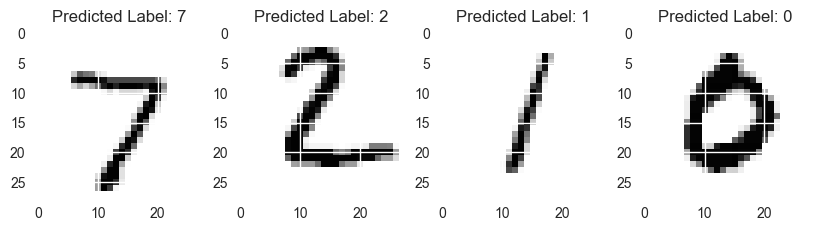

In [41]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
 
plt.figure(figsize=(10,10))
plt.subplot(4,4,1)
image_index = 0
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
plt.title("Predicted Label: "+str(pred.argmax()))
 
plt.subplot(4,4,2)
image_index = 1
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
plt.title("Predicted Label: "+str(pred.argmax()))
 
plt.subplot(4,4,3)
image_index = 2
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
plt.title("Predicted Label: "+str(pred.argmax()))
 
plt.subplot(4,4,4)
image_index = 3
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
plt.title("Predicted Label: "+str(pred.argmax()))

In [13]:
# Save the trained model to a file
model.save('handwriting_recognition_model.h5')